## Market Segmentation using clustering algorithm

This project is based on visualising and conducting exploratory data analysis on data based on bank's customers. Moreover, clustering algorithm with PCA is applied in order to maximise marketing capmpaign coversion rate as after the project, a targeted marketing ad campaign would be made that is tailored for a specific group of customers.


### Dataset

Dataset for this project can be founder: [here](https://www.kaggle.com/arjunbhasin2013/ccdata/download)

Following is the Data Dictionary for Credit Card dataset :-

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user


In [6]:
# importing different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA



In [7]:
# read the data
creditcard_df = pd.read_csv('CC GENERAL.csv')

# get a good idea about the data
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<AxesSubplot:>

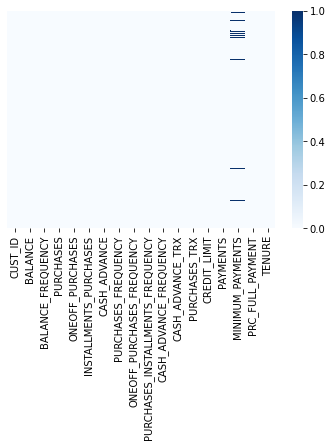

In [9]:
# use heatmap to check n/a values
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=True, cmap='Blues')

We would need to replace all the N/A values as we can't proceed with the clustering model. Hence, we'll replace every N/A values with the mean of the entire column.

In [10]:
# replace the null values in the data with the average of the column
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df[
    'MINIMUM_PAYMENTS'].mean()

In [11]:
creditcard_df.isnull().sum()
#summing all the n/a values in the dataset

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df[
    'CREDIT_LIMIT'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
# removing the customer ID column as we wont be using it
creditcard_df.drop(['CUST_ID'], axis=1, inplace=True)

In [9]:
# check the names of the columns
for i in range(len(creditcard_df.columns)): print(creditcard_df.columns[i])

BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


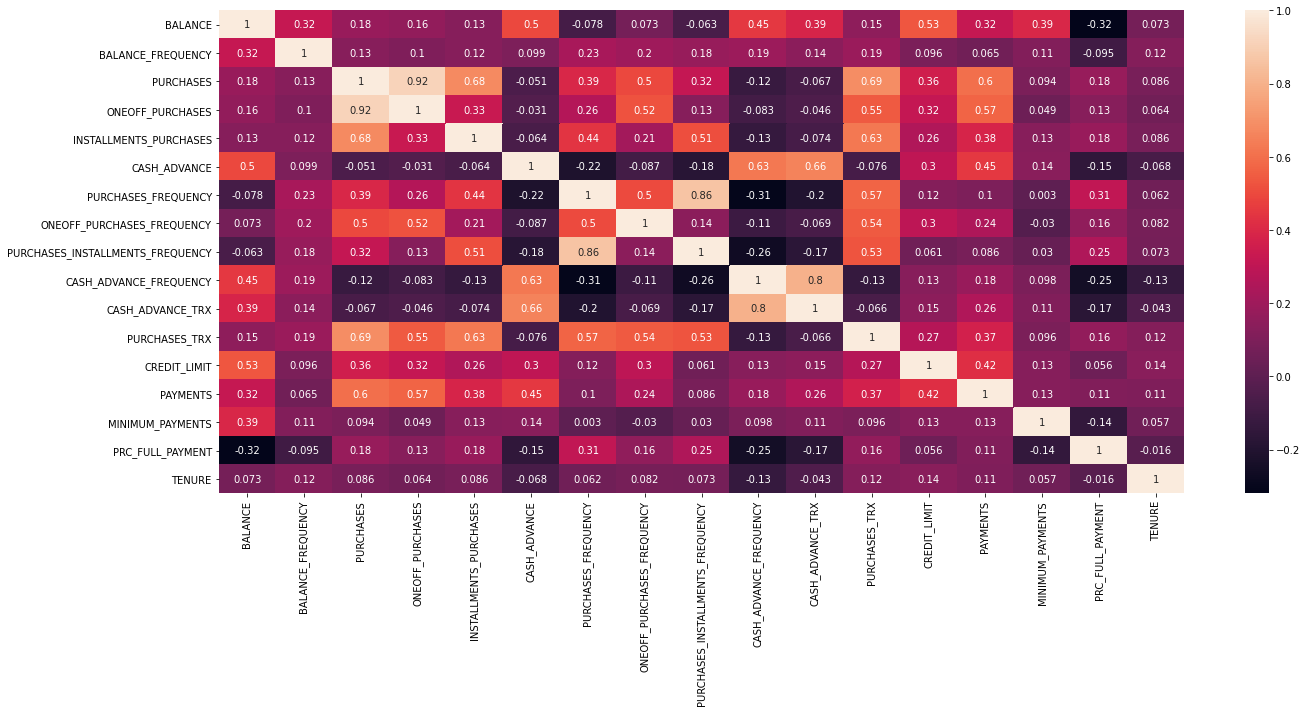

In [10]:
# finding out correlation between the variables
correlation= creditcard_df.corr()
f,ax= plt.subplots(figsize=(20,10))
sns.heatmap(correlation,annot= True)
plt.tight_layout()
plt.show()

In [16]:
import warnings
warnings.filterwarnings('ignore')

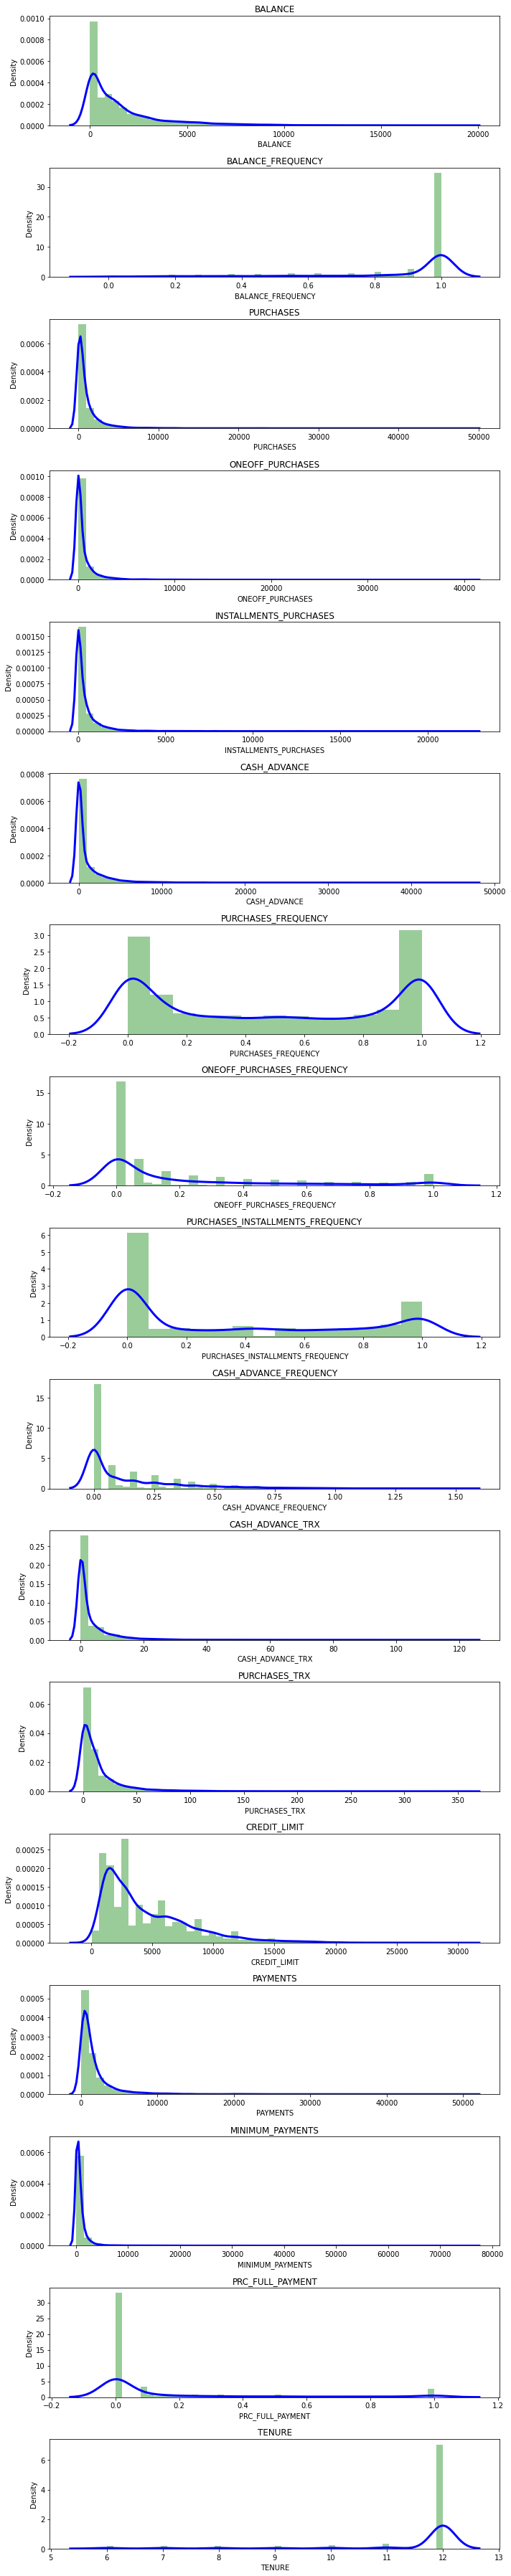

In [17]:
#plotting in oreder to get a better idea about the dataset

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
               plt.subplot(17,1, i+1)
               sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, 
                            hist_kws={'color':'g'})
               plt.title(creditcard_df.columns[i])
plt.tight_layout()
               
plt.show()
    

In [30]:
#We'll first feature scale our data as it helps the program to run faster and the clustering model gets more efficient
scaler=StandardScaler()
creditcard_df_scaled= scaler.fit_transform(creditcard_df)
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

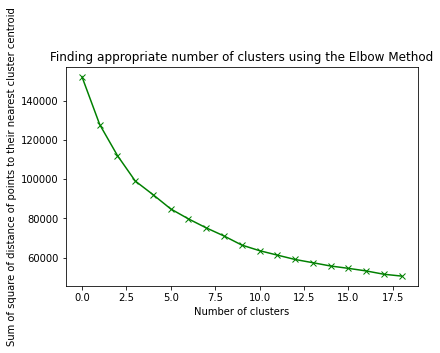

In [21]:
#finding out the square of distance of a point to the nearest cluster centre in order to proceed through the 
#elbow method to find the optimum number of clusters
square_dist=[]
values= range(1,20) #range of the number of clusters

for i in values:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    square_dist.append(kmeans.inertia_)
    
plt.plot(square_dist, 'gx-')
plt.title('Finding appropriate number of clusters using the Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square of distance of points to their nearest cluster centroid')
plt.tight_layout()
plt.show()

From the plot, its clear that the optimum number of clusters is at number 8/9. However, we'll proceed with the number of clusters as 8.

In [22]:
#from the above plot its clear that the number of clusters should be 8
kmeans=KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels=kmeans.labels_


In [23]:
#predicting the label of each data point
ymeans= kmeans.fit_predict(creditcard_df_scaled)
ymeans

array([2, 4, 3, ..., 6, 6, 6])

In [24]:
#adding a column of labels to the existing data frame and renaming it
creditcard_df_cluster= pd.concat([creditcard_df, pd.DataFrame({'CLUSTER_NUMBER': labels})], axis=1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_NUMBER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


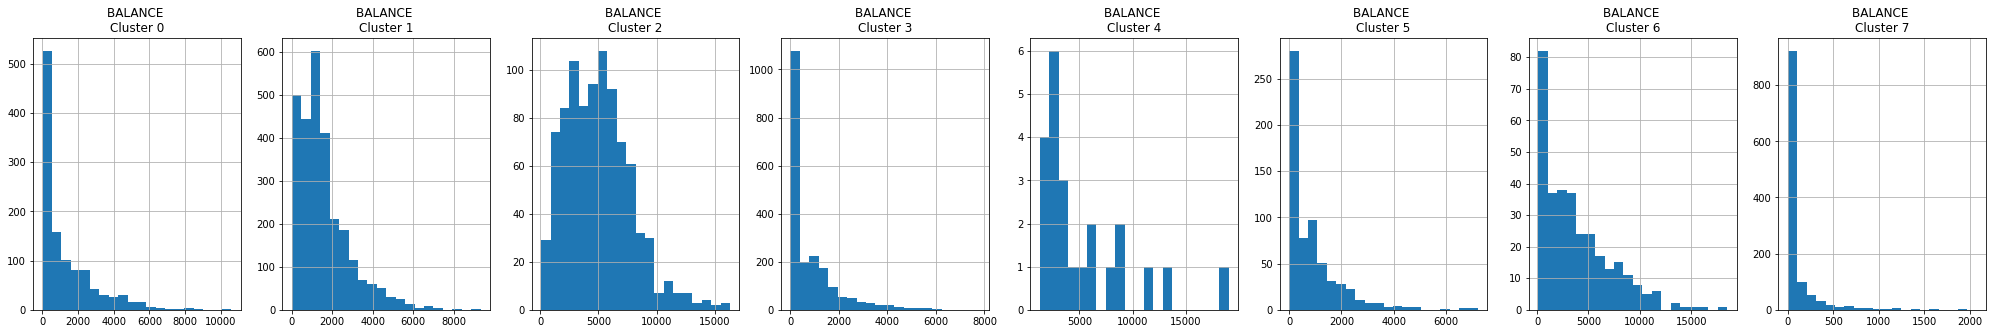

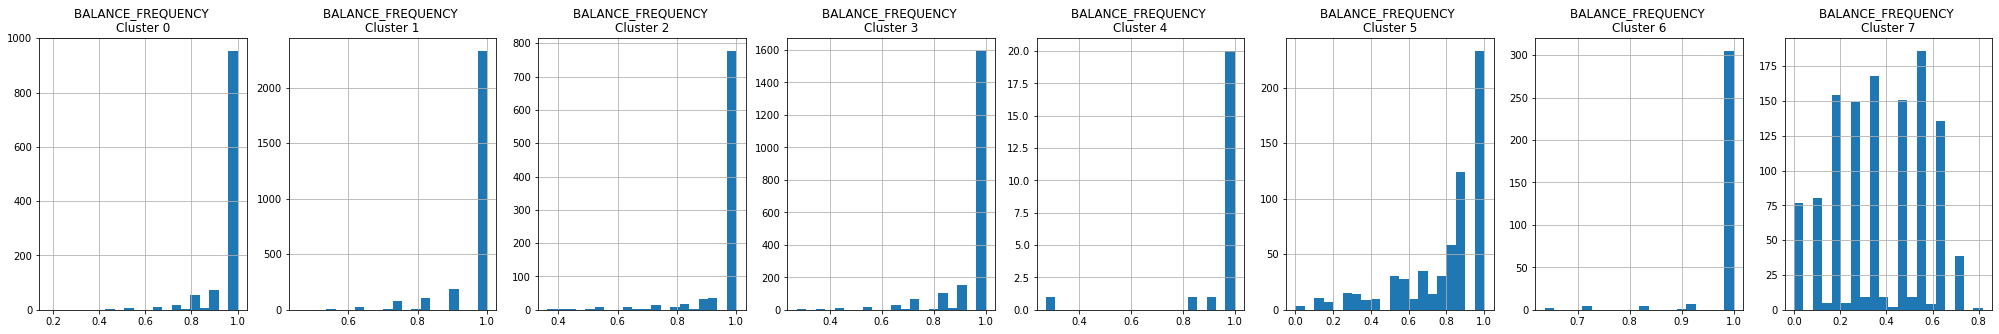

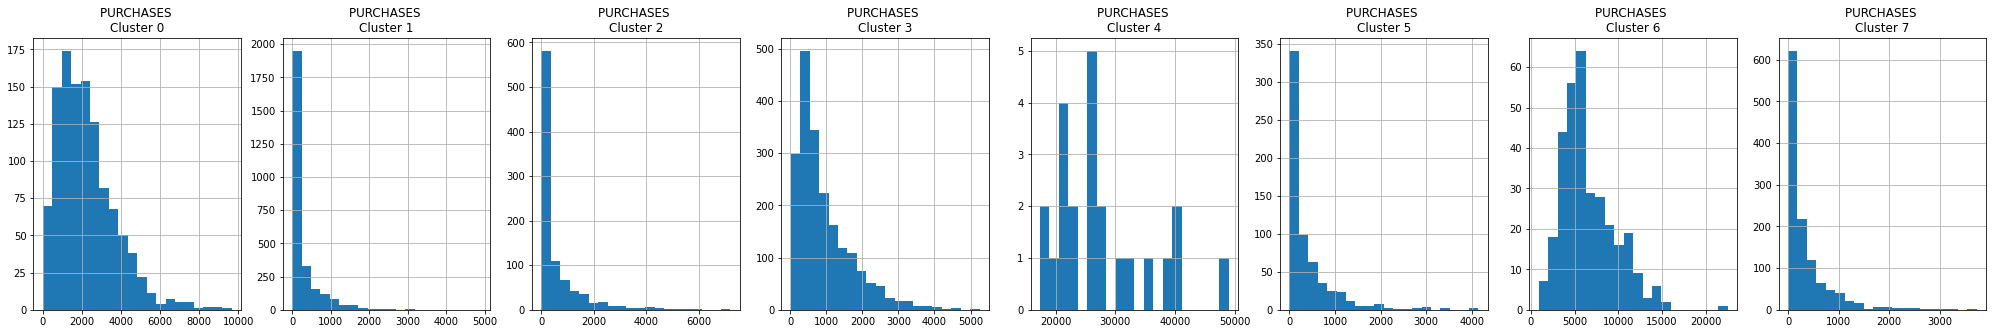

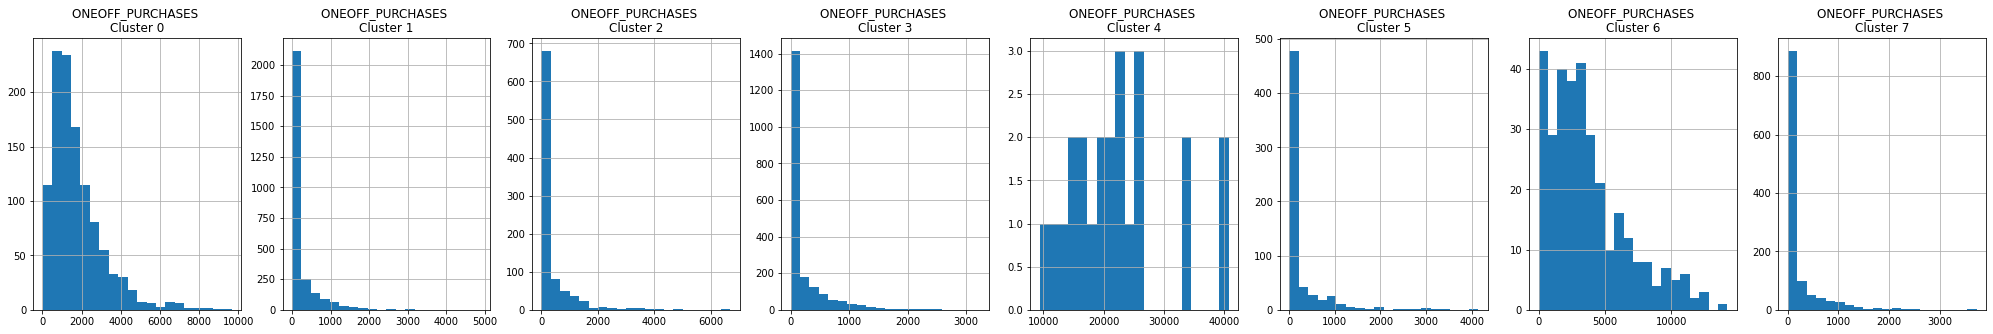

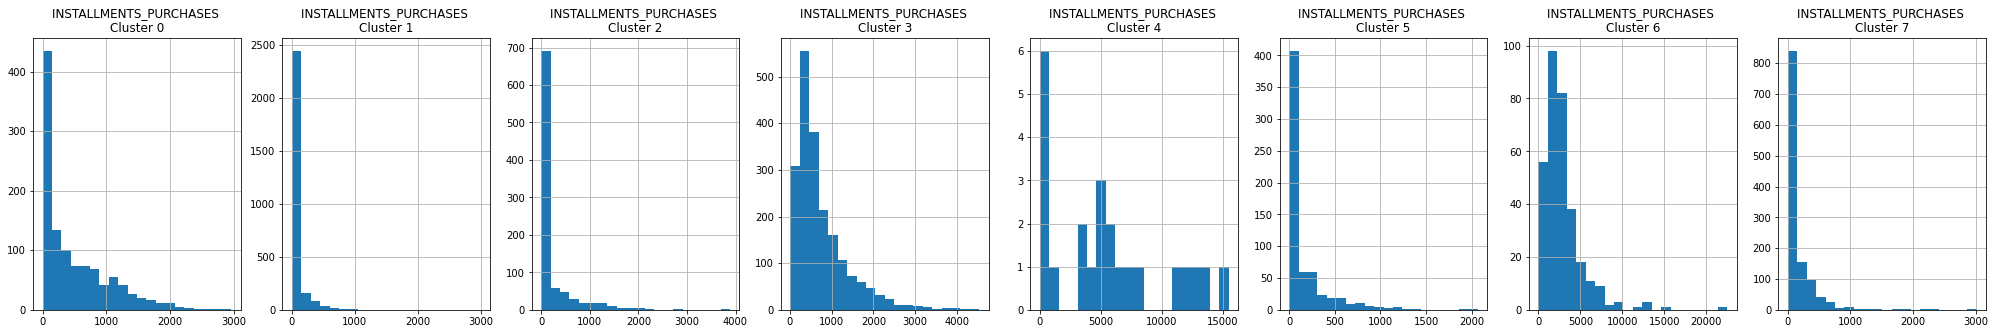

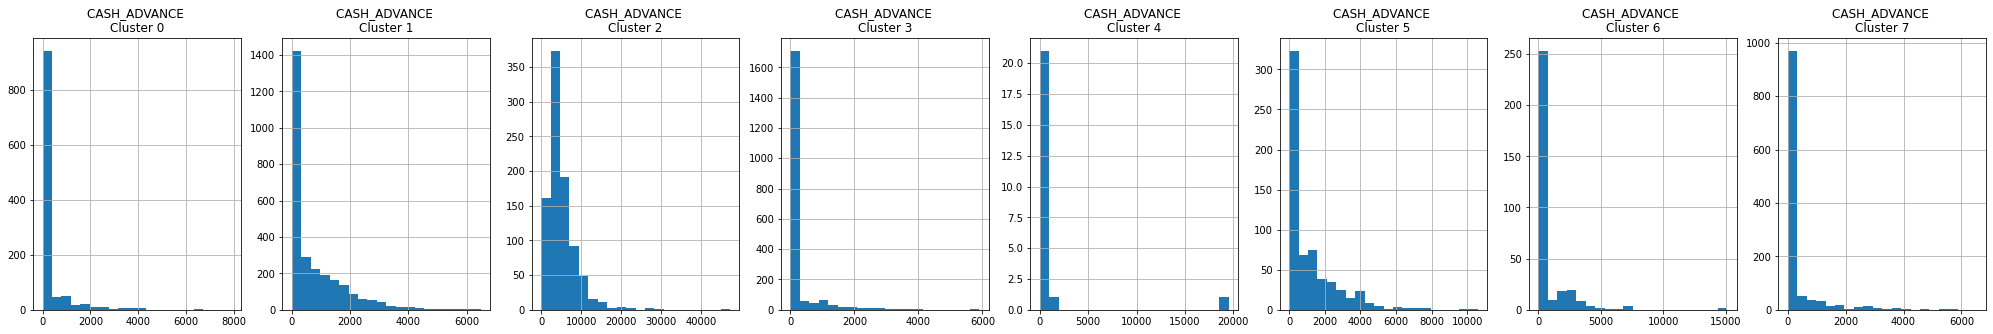

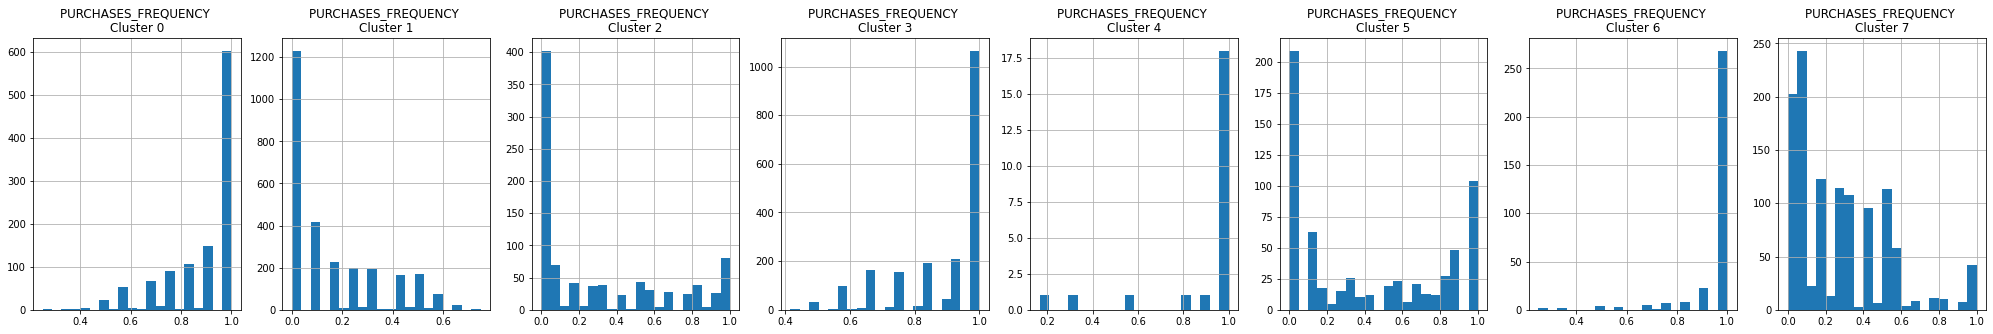

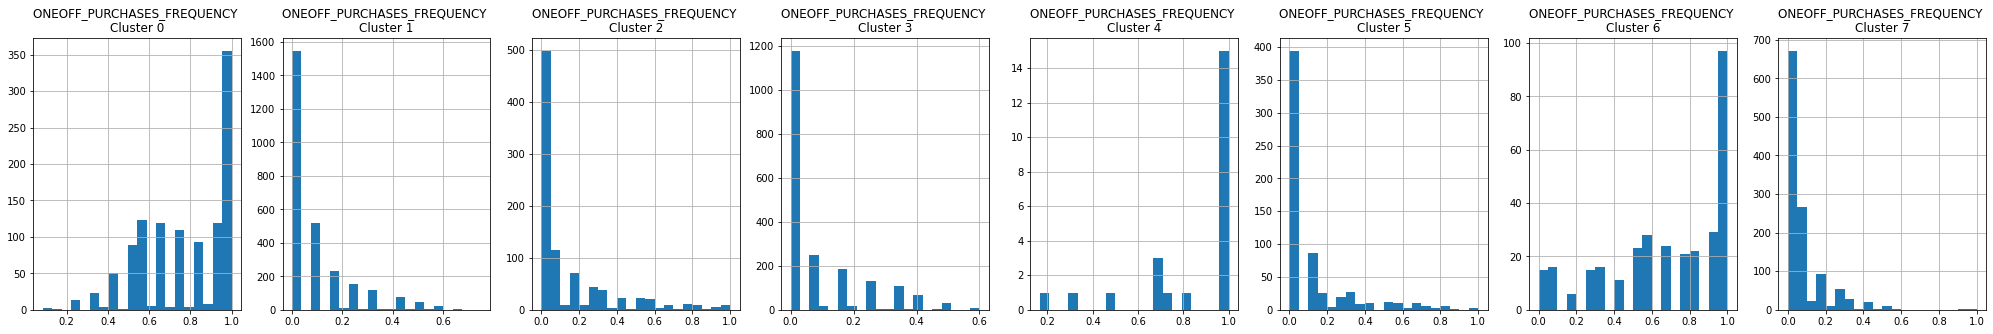

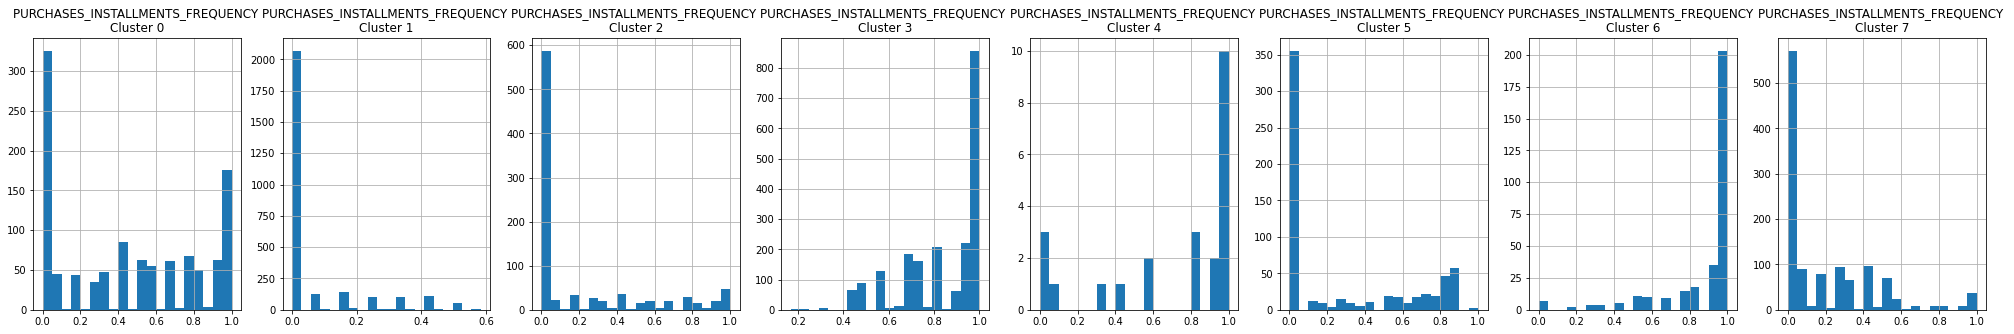

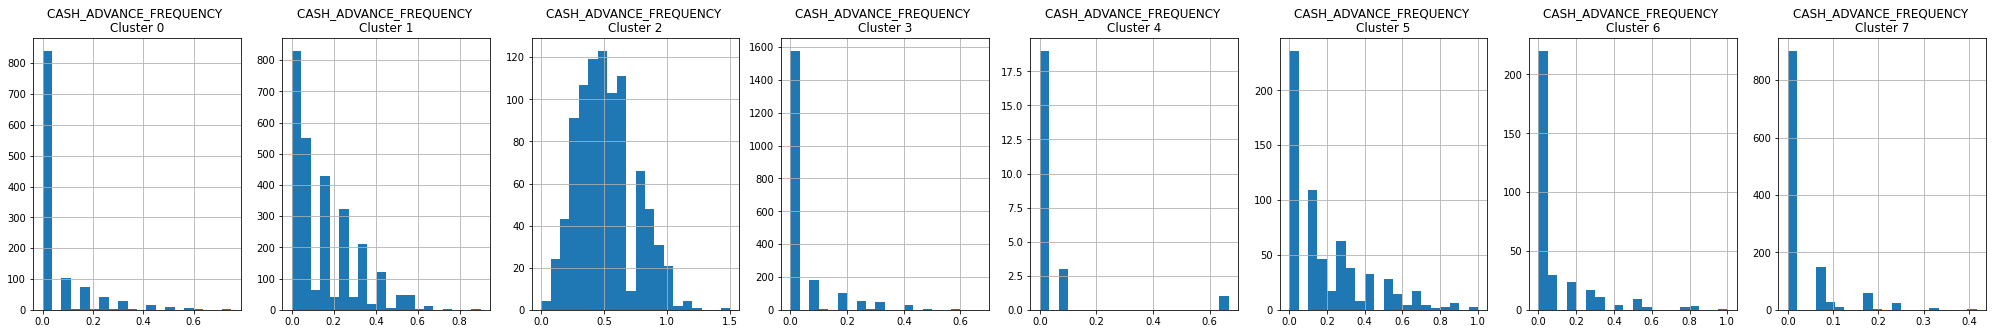

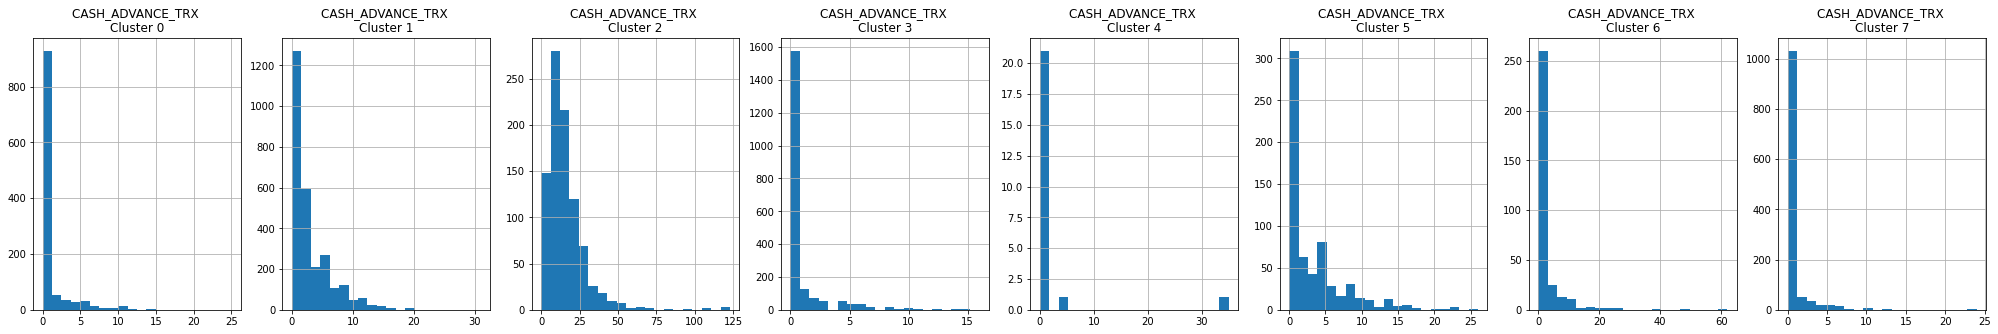

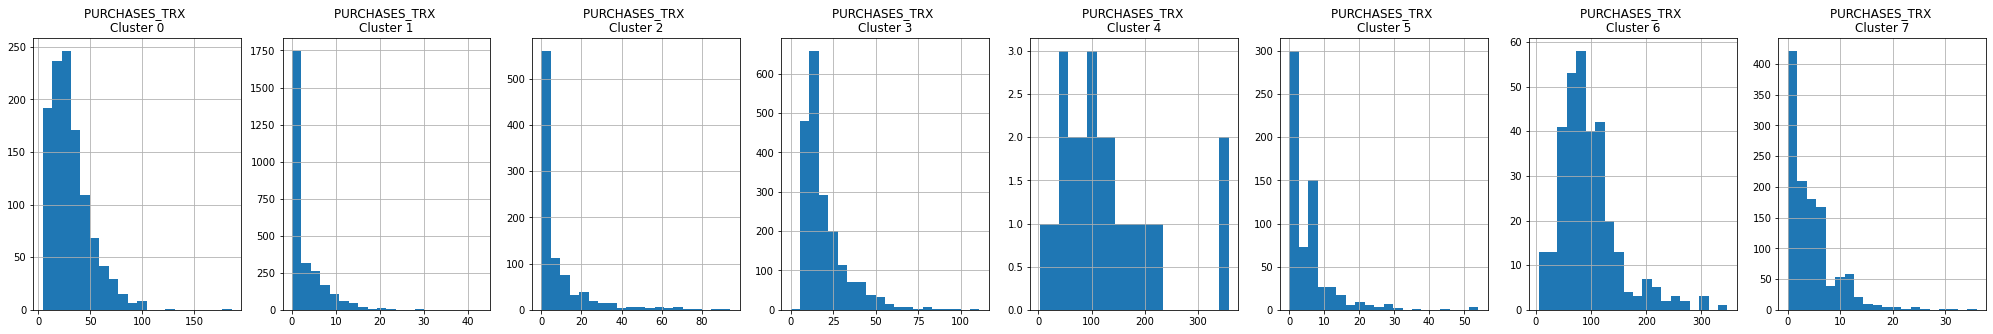

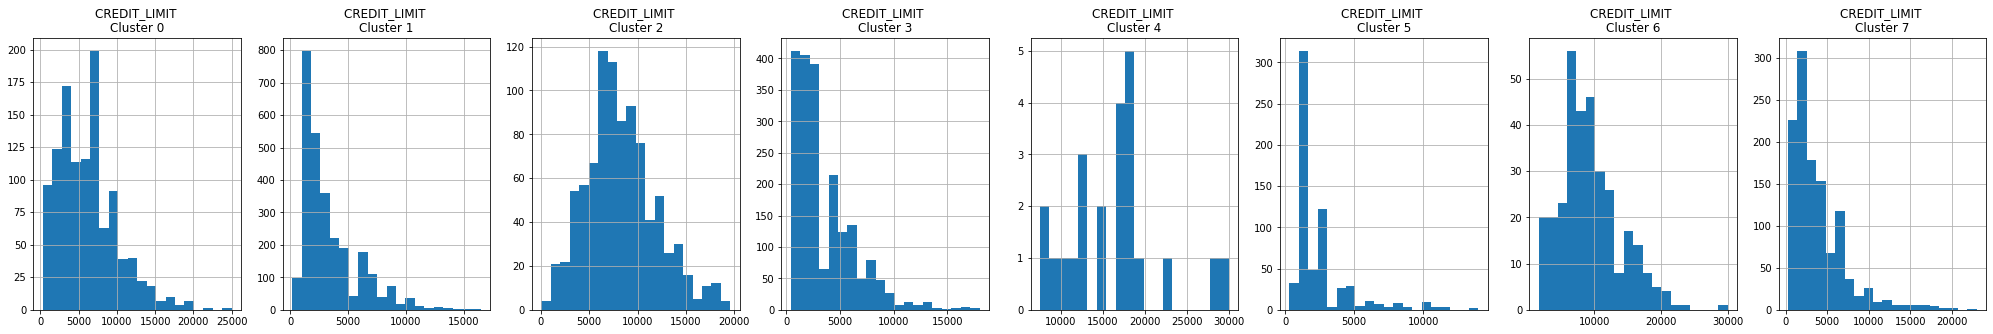

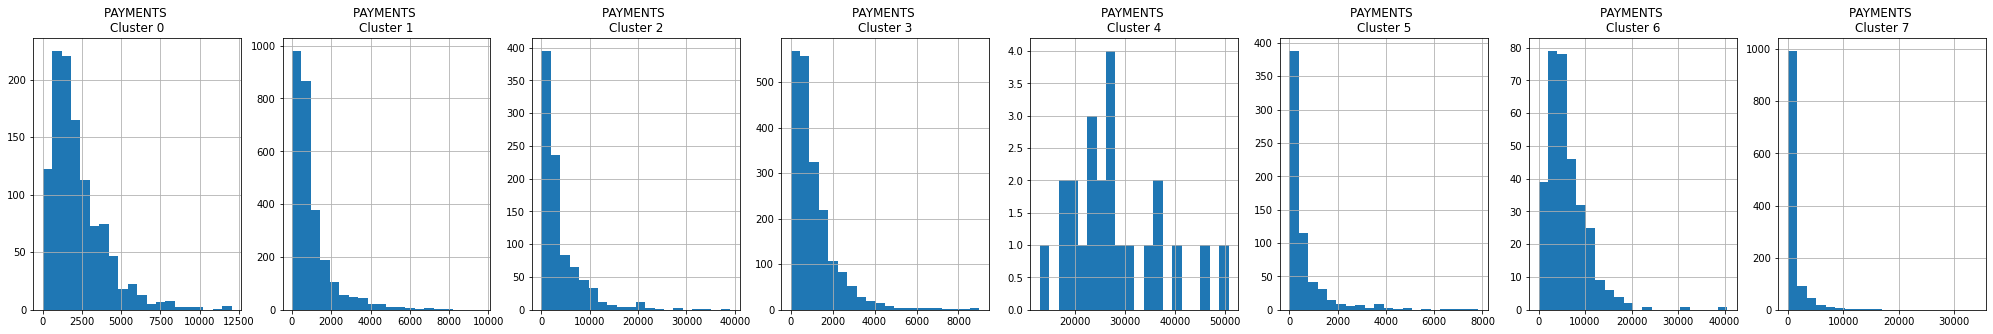

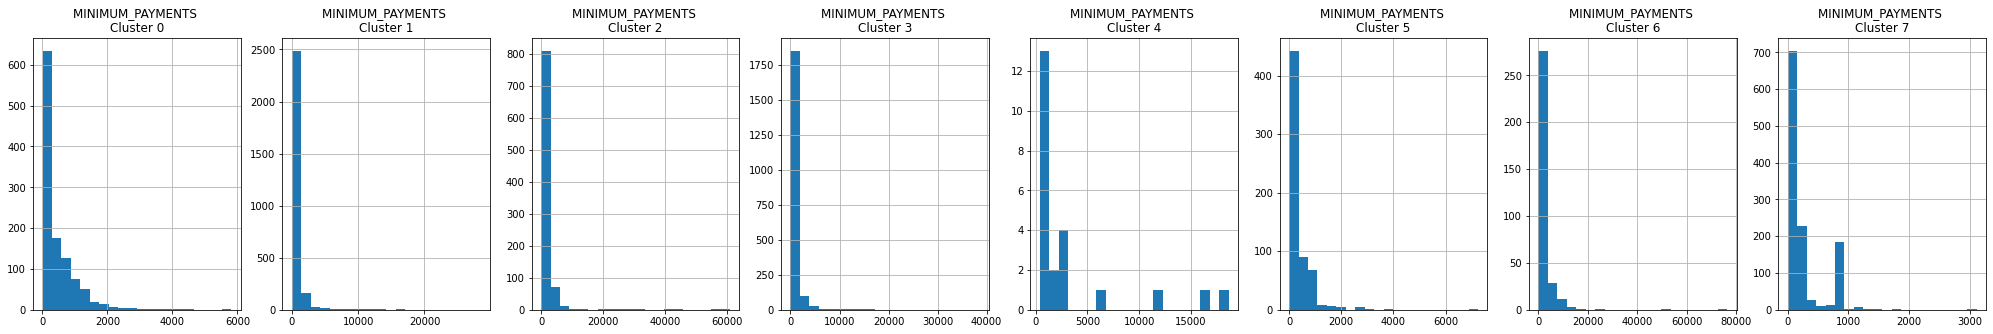

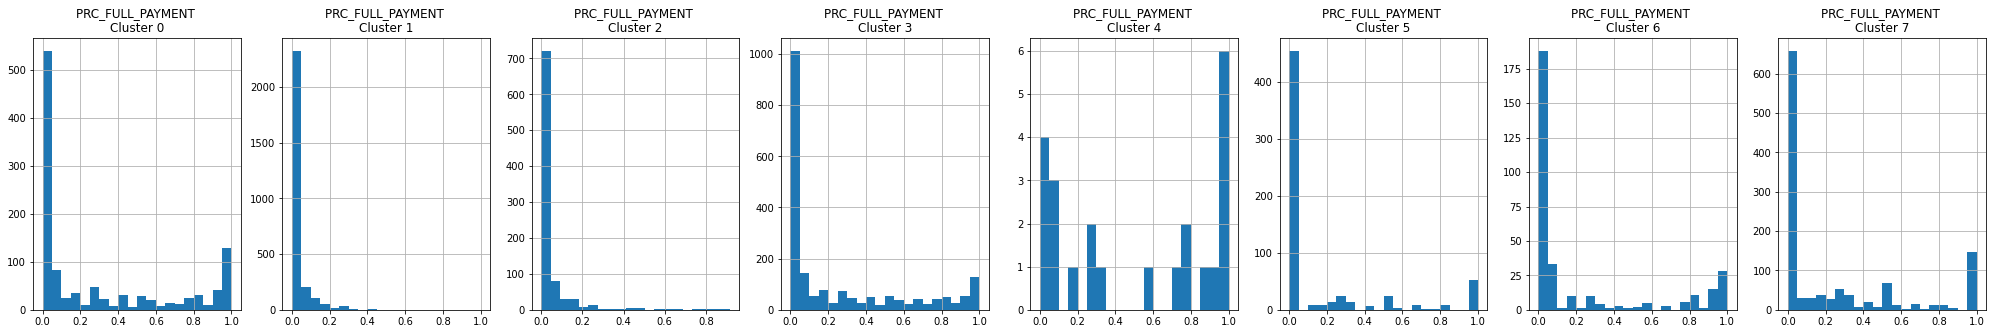

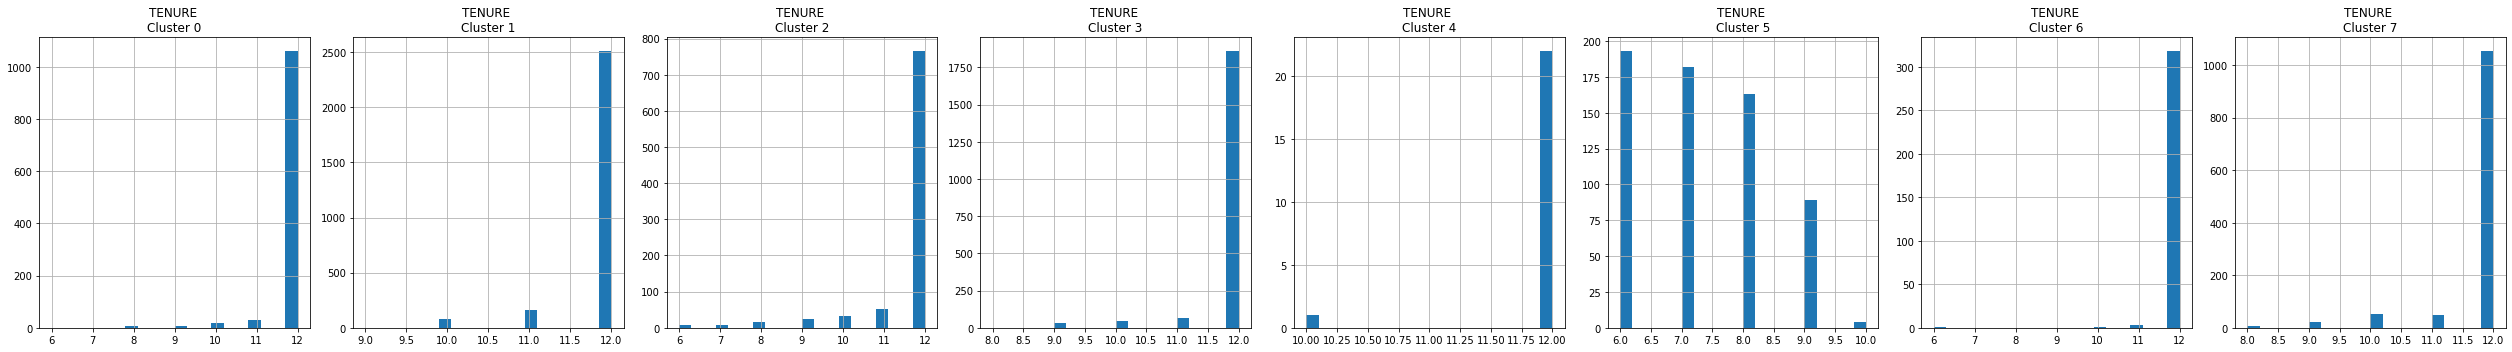

In [25]:
#plotting a plot based on the number of clusters how the data varies
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['CLUSTER_NUMBER']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {}'.format(i,j))
#plt.rcParams.update({'figure.autolayout': True})
plt.tight_layout()
plt.show()

In [32]:
#applying principal component analysis and reducing the dimensions into 2
pca= PCA(n_components=2)
pca_comp=pca.fit_transform(creditcard_df_scaled)
pca_comp

array([[-1.68222069, -1.07644624],
       [-1.13829526,  2.50649352],
       [ 0.96968245, -0.38352142],
       ...,
       [-0.92620398, -1.81078768],
       [-2.33655118, -0.65797087],
       [-0.55642115, -0.40047726]])

In [34]:
pca_df=pd.DataFrame(data=pca_comp,columns={'PCA1','PCA2'}) #converting the array into dataframe
pca_df

,PCA2,PCA1
0,-1.682221,-1.076446
1,-1.138295,2.506494
2,0.969682,-0.383521
3,-0.873628,0.043174
4,-1.599434,-0.688579
...,...,...
8945,-0.359630,-2.016148
8946,-0.564369,-1.639125
8947,-0.926204,-1.810788
8948,-2.336551,-0.657971


In [35]:
#adding the column of labels to the existing dataframe
pca_df=pd.concat([pca_df,pd.DataFrame({'CLUSTER_NUMBERS':labels})],axis=1)
pca_df

,PCA2,PCA1,CLUSTER_NUMBERS
0,-1.682221,-1.076446,1
1,-1.138295,2.506494,2
2,0.969682,-0.383521,0
3,-0.873628,0.043174,1
4,-1.599434,-0.688579,1
...,...,...,...
8945,-0.359630,-2.016148,5
8946,-0.564369,-1.639125,5
8947,-0.926204,-1.810788,5
8948,-2.336551,-0.657971,5


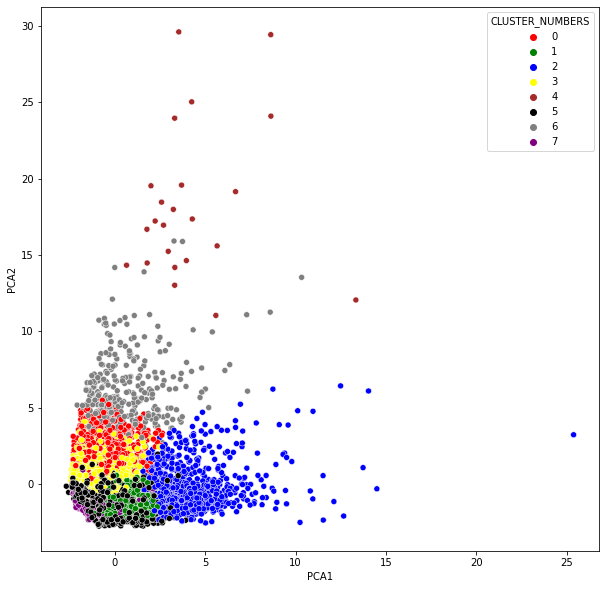

In [37]:
#plotting the clusters

plt.figure(figsize=(10,10))
sns.scatterplot(x='PCA1',y='PCA2', data=pca_df, hue='CLUSTER_NUMBERS', palette=['red','green','blue','yellow','brown','black','grey','purple'])
plt.show()
